In [69]:

import seaborn as sns
import matplotlib.pyplot as plt


Izpit iz vaj (12. 12. 2023)
Tematika podatkov: Zadovoljstvo potnikov z letom
Med potniki, ki potujejo z letalom, je bila izvedena raziskava z namenom ugotoviti, kateri dejavniki močno vplivajo na njihovo zadovoljstvo oziroma nezadovoljstvo z letom. Pridobljeni podatki so razdeljeni v tri datoteke:
datoteko s podatki o potniku in letu (passengers.csv),
datoteko s podatki o zadovoljstvu glede na različne kriterije (passengers_service_rating.txt),
datoteko s podatki o zamudah in končni oceni zadovoljstva (passengers_satisfaction.xlsx).
Opis spremenljivk
Gender - spol potnika (kategorični: ‘Female’, ‘Male’)
Customer Type - tip stranke - ali gre za redno stranko ali ne (kategorični: ‘Loyal customer’, ‘disloyal customer’)
Age - točna starost potnika (številski)
Type of Travel - namen potnikovega leta (kategorični: ‘Personal Travel’, ‘Business Travel’)
Class - v katerem razredu je letel potnik (kategorični: ‘Business’, ‘Eco’, ‘Eco Plus’)
Flight Distance - dolžina leta (številski)
Inflight wifi service - stopnja zadovoljstva za wifi storitev na letalu (številski: 0:‘Not Applicable’; 1-5)
Departure/Arrival time convenient - stopnja zadovoljstva za organiziran čas odhoda/prihoda (številski)
Ease of Online booking - stopnja zadovoljstva za spletno rezervacijo (številski)
Gate location - stopnja zadovoljstva za lokacijo vrat, za vkrcanje na letalo (številski)
Food and drink - stopnja zadovoljstva za hrano in pijačo na letalu (številski)
Online boarding - stopnja zadovoljstva za vkrcavanje na letalo (številski)
Seat comfort - stopnja zadovoljstva za udobje sedežev (številski)
Inflight entertainment - stopnja zadovoljstva za ponujeno zabavo med letom (številski)
On-board service - stopnja zadovoljstva za ponujene storitve na letalu (številski)
Leg room service - stopnja zadovoljstva za storitve za noge (številski)
Baggage handling - stopnja zadovoljstva za ravnanje s prtljago (številski)
Checkin service - stopnja zadovoljstva za storitev prijave (številski)
Inflight service - stopnja zadovoljstva za izvedene storitve na letalu (številski)
Cleanliness - stopnja zadovoljstva s čistočo (številski)
Departure Delay in Minutes - čas zamude od odhodu v minutah (številski)
Arrival Delay in Minutes - čas zamude ob prihodu v minutah (številski)
Satisfaction - zadovoljstvo z letom (kategorični: ‘Satisfaction’, ‘neutral or dissatisfaction’)
Final_rating - končna ocena zadovoljstva potnika z letom (številski)

### Naloga 1 (5T)

Najprej preberite vse tri datoteke s podatki: `passengers.csv`, `passengers_service_rating.txt` in `passengers_satisfaction.xlsx`. Vse prebrane podatke združite v eno datoteko. Pri združevanju pazite, da potnike združite po njihovi ID številki. Indeks stolpec naj bo poimenovan `Passenger_id`.

- Izpišite prve štiri vrstice združenih podatkov.
- Izpišite število stolpcev ter število vrstic združenih podatkov.
- Izpišite podatkovne tipe za vse stolpce.

In [70]:
import pandas as pd

df1 = pd.read_csv('passengers.csv', index_col=0, sep=';', decimal='.')

df2 = pd.read_csv('passengers_service_rating.txt', index_col=0, sep='\t')
df3 = pd.read_excel('passengers_satisfaction.xlsx', index_col=0, sheet_name=0)
df1.index.name="passenger_id"
df=pd.concat([df1,df2,df3], axis=1)

df.head(4)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction,Final_rating
passenger_id,,,,,,,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,4,3,1,...,4,3,4,4,5,5,25.0,18.0,neutral or dissatisfied,65.0
5047,Male,disloyal Customer,25,Business travel,NaN,235.0,3,2,3,3,...,1,5,3,1,4,1,1.0,6.0,neutral or dissatisfied,45.0
110028,Female,Loyal Customer,26,Business travel,Business,1142.0,2,2,2,2,...,4,3,4,4,4,5,0.0,0.0,satisfied,72.0
24026,Female,Loyal Customer,25,Business travel,Business,562.0,2,5,5,5,...,2,5,3,1,4,2,11.0,9.0,neutral or dissatisfied,29.0


In [71]:
df.shape


(103904, 24)

In [72]:
df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                      float64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes           float64
Arrival Delay in Minutes             float64
Satisfacti

### Naloga 2 (15T)

- Prikažite povprečno dolžino leta (`Flight Distance`), glede na namen potovanja (poslovno/zasebno), zaokroženo na eno decimalko.

- V obliko razpredelnice shranite *starost, potovalni razred in končno oceno leta* za vse potnike, ki z letom niso bili zadovoljni in je bila njihova končna ocena med 11 in 14. Zbrane potnike sortirajte po starosti, od najstarejšega do najmlajšega. Iz te razpredelnice izpišite podatke za 5 najstarejših potnikov.

- Izrišite graf, ki bo prikazoval maksimalni čas zamude ob prihodu (`Arrival Delay in Minutes`) glede na tip zadovoljstva z letom (`Satisfaction`). Graf naj bo pobarvan v odtenke oranžne.

- Izrišite graf raztrosa, tako da bo prikazoval stopnjo zadovoljstva s hrano in pijačo glede na dolžino leta, ločeno glede na razred (`Class`), v katerem je potnik letel (vsak razred mora biti prikazan v obliki ločenega podgrafa brez črte).

### Naloga 3 *(5 T)*

- Izpišite koliko je manjkajočih podatkov v posameznih stolpcih.
- Nato manjkajoče podatke iz stolpcev zapolnite s sledečo strategijo:
    - `Flight Distance` in `Arrival Delay in Minutes` zapolnite s povprečno vrednostjo stolpca.
    - `Type of Travel` in `Class` zapolnite z najpogosteje pojavljeno vrednostjo stolpca
    - Za ostale manjkajoče vrednosti poskrbite tako, vrstice z manjkajočimi podatki odstranite.
  

- Ponovno izpišite število manjkajočih podatkov, vendar samo za stoplce, ki smo jih dopolnjevali.

In [73]:
df.isna().sum()

Gender                                  0
Customer Type                           0
Age                                     0
Type of Travel                         72
Class                                  95
Flight Distance                       178
Inflight wifi service                   0
Departure/Arrival time convenient       0
Ease of Online booking                  0
Gate location                           0
Food and drink                          0
Online boarding                         0
Seat comfort                            0
Inflight entertainment                  0
On-board service                        0
Leg room service                        0
Baggage handling                        0
Checkin service                         0
Inflight service                        0
Cleanliness                             0
Departure Delay in Minutes              0
Arrival Delay in Minutes              960
Satisfaction                            0
Final_rating                      

In [74]:
avg1=df["Flight Distance"].mean()
#print(avg1)
avg2=df["Arrival Delay in Minutes"].mean()
#print(avg1)
df["Flight Distance"]=df["Flight Distance"].fillna(avg1)
df["Arrival Delay in Minutes"]=df["Arrival Delay in Minutes"].fillna(
    avg2
)

df.isna().sum()

Gender                                  0
Customer Type                           0
Age                                     0
Type of Travel                         72
Class                                  95
Flight Distance                         0
Inflight wifi service                   0
Departure/Arrival time convenient       0
Ease of Online booking                  0
Gate location                           0
Food and drink                          0
Online boarding                         0
Seat comfort                            0
Inflight entertainment                  0
On-board service                        0
Leg room service                        0
Baggage handling                        0
Checkin service                         0
Inflight service                        0
Cleanliness                             0
Departure Delay in Minutes              0
Arrival Delay in Minutes                0
Satisfaction                            0
Final_rating                      

In [75]:
maxoccurance1=df["Type of Travel"].value_counts().idxmax()
maxoccurance2=df["Class"].value_counts().idxmax()

df["Type of Travel"]=df["Type of Travel"].fillna(maxoccurance1)
df["Class"]=df["Class"].fillna(maxoccurance2)

df.isna().sum()

Gender                                  0
Customer Type                           0
Age                                     0
Type of Travel                          0
Class                                   0
Flight Distance                         0
Inflight wifi service                   0
Departure/Arrival time convenient       0
Ease of Online booking                  0
Gate location                           0
Food and drink                          0
Online boarding                         0
Seat comfort                            0
Inflight entertainment                  0
On-board service                        0
Leg room service                        0
Baggage handling                        0
Checkin service                         0
Inflight service                        0
Cleanliness                             0
Departure Delay in Minutes              0
Arrival Delay in Minutes                0
Satisfaction                            0
Final_rating                      

In [76]:
df=df.dropna()
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Satisfaction                         0
Final_rating                         0
dtype: int64

In [77]:
df[["Class","Type of Travel","Flight Distance","Arrival Delay in Minutes"]].isna().sum()

Class                       0
Type of Travel              0
Flight Distance             0
Arrival Delay in Minutes    0
dtype: int64


### Naloga 4 *(10 T)*

- Ustvarite dve kopiji datafram-a `dfRegresija` in `dfKlasifikacija`:
  - `dfKlasifikacija` je dataframe, ki ga boste uporabili za klasifikacijo, in sicer boste napovedovali ali je bil potnik zadovoljen z letom (`Satisfaction`).
  - `dfRegresija` je dataframe, ki ga boste uporabili za regresijo, in sicer boste napovedovali končna ocena zadovoljstva potnika z letom (`Final_rating`).
- Podatke v obeh dataframih **ustrezno predprocesirajte(!)** - kategorične vrednosti pretvorite v številske (lahko uporabite LabelEncoder), številske pa standardizirajte.
- Izpišite prve 3 vrstice iz vsakega dataframa.

In [78]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

dfRegresija = df.copy()
dfKlasifikacija = df.copy()

katR = dfRegresija.select_dtypes(include='object').columns         
katK = dfRegresija.select_dtypes(include='object').columns
katK = katK.drop('Satisfaction')

for k in katK:
    dfKlasifikacija[k]=LabelEncoder().fit_transform(dfKlasifikacija[k])
for k in katR:
    dfRegresija[k]=LabelEncoder().fit_transform(dfRegresija[k])
    


In [79]:
stR=dfRegresija.select_dtypes(exclude="object").columns
stR=stR.drop("Final_rating")

stK=dfKlasifikacija.select_dtypes(exclude="object").columns


dfRegresija[stR]=StandardScaler().fit_transform(dfRegresija[stR])
dfKlasifikacija[stK]=StandardScaler().fit_transform(dfKlasifikacija[stK])






In [80]:
dfKlasifikacija.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction,Final_rating
passenger_id,,,,,,,,,,,,,,,,,,,,,
70172,1.014624,-0.473479,-1.742019,1.484684,2.261663,-0.730444,0.206153,0.615250,0.175003,-1.548766,...,0.481651,-0.264784,0.313748,0.551792,1.158392,1.308001,0.264740,0.080569,neutral or dissatisfied,0.294585
5047,1.014624,2.112027,-0.948894,-0.673544,-0.959977,-0.956511,0.206153,-0.696534,0.175003,0.017321,...,-1.845583,1.255410,-0.533042,-1.817771,0.307735,-1.738964,-0.361661,-0.234116,neutral or dissatisfied,-0.370400
110028,-0.985587,-0.473479,-0.882800,-0.673544,-0.959977,-0.045209,-0.548590,-0.696534,-0.540720,-0.765722,...,0.481651,-0.264784,0.313748,0.551792,0.307735,1.308001,-0.387761,-0.391459,satisfied,0.527330


In [81]:
dfRegresija.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction,Final_rating
passenger_id,,,,,,,,,,,,,,,,,,,,,
70172,1.014624,-0.473479,-1.742019,1.484684,2.261663,-0.730444,0.206153,0.615250,0.175003,-1.548766,...,0.481651,-0.264784,0.313748,0.551792,1.158392,1.308001,0.264740,0.080569,-0.866813,65.0
5047,1.014624,2.112027,-0.948894,-0.673544,-0.959977,-0.956511,0.206153,-0.696534,0.175003,0.017321,...,-1.845583,1.255410,-0.533042,-1.817771,0.307735,-1.738964,-0.361661,-0.234116,-0.866813,45.0
110028,-0.985587,-0.473479,-0.882800,-0.673544,-0.959977,-0.045209,-0.548590,-0.696534,-0.540720,-0.765722,...,0.481651,-0.264784,0.313748,0.551792,0.307735,1.308001,-0.387761,-0.391459,1.153651,72.0


Naloga 5 (10 T)
S pomočjo regresija poskusite napovedati končno oceno zadovoljstva potnika z letom (Final_rating). Za podatke uporabite predprocesiran dataframe dfRegresija. Iz vhodnih podatkov izpustite tudi podatek Satisfaction. Podatke delite na učno in testno množico v razmerju 75:25. Naključno stanje naj bo 123. Za regresor uporabite regresijsko drevo.
Kako dobro se je naučil model ocenite s povprečno kvadratno napako, zaokroženo na eno decimalko.

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

izhod="Final_rating"
vhod=dfRegresija.drop(["Final_rating", "Satisfaction"], axis=1)

x_train,x_test,y_train,y_test=train_test_split(vhod,dfRegresija[izhod], test_size=0.25,random_state=123)
algoritem=DecisionTreeRegressor()
algoritem.fit(x_train, y_train)
rezultat= algoritem.predict(x_test)

from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test,rezultat))

708.8272877488394


S pomočjo klasifikacije bomo napovedovali zadovoljstvo potnikov z letom (Satisfaction). Iz vhodnih podatkov odstranite še stolpec Final_rating. Podatke iz predprocesiranega dfKlasifikacija delite na učne in testne in sicer s pomočjo stratificirane delitve na 3 folde.
Nad podatkih preizkusite dva klasifikatorja - naključni gozd in K najbližjih sosedov. Ker želimo doseči najvišjo možno točnost klasifikacije to izvedite s pomočjo iskanja najboljših nastavitev parametrov po principu mreže (GridSearchCV).
Za nakjučni gozd preizkusite:
število dreves 50 in 100,
kriterij “gini” in “entropy”.
Za K najbližjih sosedov pa:
2, 5 in 10 sosedov.
Najboljše izračunane vrednosti točnosti za oba klasifkatorja prikažite v stolpičnem grafu.

['RF', 'KNN']
[0.961375809441592, 0.9262137348619676]


C:\Users\jasar\ANACONDA3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


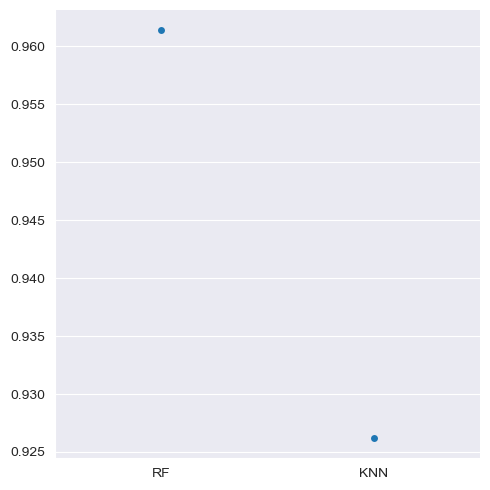

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

izhod="Satisfaction"
vhod=dfKlasifikacija.drop(["Satisfaction","Final_rating"],axis=1)

parametriRF={"n_estimators": [50,100], "criterion": ["gini","entropy"]}

parametriKNN={"n_neighbors": [2,5,10]}

delitev=StratifiedKFold(n_splits=3)

algoritem1=GridSearchCV(RandomForestClassifier(),parametriRF,cv=delitev,scoring='accuracy')
algoritem1.fit(vhod,dfKlasifikacija[izhod])

algoritem2=GridSearchCV(KNeighborsClassifier(),parametriKNN,cv=delitev,scoring='accuracy')
algoritem2.fit(vhod,dfKlasifikacija[izhod])

najbolsi_algoritem = ['RF', 'KNN']
najbolse_tocnoosti = [algoritem1.best_score_, algoritem2.best_score_]

print(najbolsi_algoritem)
print(najbolse_tocnoosti)

sns.catplot(x=najbolsi_algoritem, y=najbolse_tocnoosti) 